<a href="https://colab.research.google.com/github/PabloJRW/clustering/blob/main/proyecto_clustering_platzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de librerías 
# para manipulación y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
data_path = 'https://raw.githubusercontent.com/PabloJRW/clustering/main/datasets/marketing_campaign.csv'
df = pd.read_csv(data_path, delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# El dataset contiene valores nulos?
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Contiene entradas duplicadas?
print("El dataset contiene {} entradas duplicadas".format(df.duplicated().sum()))

El dataset contiene 0 entradas duplicadas


In [7]:
# Cantidad de valores únicos por columna
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

ID: 2240
Year_Birth: 59
Education: 5
Marital_Status: 8
Income: 1974
Kidhome: 3
Teenhome: 3
Dt_Customer: 663
Recency: 100
MntWines: 776
MntFruits: 158
MntMeatProducts: 558
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Complain: 2
Z_CostContact: 1
Z_Revenue: 1
Response: 2


In [8]:
# Borro las variables que no aportan información 
# Ambas sólo contienen un valor
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Convierto la variable "Dt_Customer" a tipo fecha
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True)

### Feature Engineering ###
last_year = 2014 # último año registrado

# Edad de los clientes
df['Age'] = last_year - df['Year_Birth']

# Total gastado por cliente
spent_vars = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['TotalSpent'] = df[spent_vars].sum(axis=1)

# Cantidad de veces que el cliente ha realizado una compra
purchases_vars = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
df['TotalPurchases'] = df[purchases_vars].sum(axis=1) 

# Cantidad de años como cliente
df['YearsEnrolled'] = last_year - df['Dt_Customer'].dt.year

In [9]:
# Importación de librerías
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [10]:
# Variables a utilizar
vars_for_cluster = ['TotalSpent','TotalPurchases', 'Recency', 'Age']

# Copia del dataset para prueba
df1 = df[vars_for_cluster].copy()
df1.sample(5)

,TotalSpent,TotalPurchases,Recency,Age
2057,1034,23,10,38
2001,13,3,36,47
1888,820,21,38,39
1519,106,5,2,44
1912,1564,23,85,43


In [11]:
# Elimino las entradas donde el valor en la variable "Age" es mayor a 100
df1.drop(df1[df1['Age'] > 100].index, inplace=True)

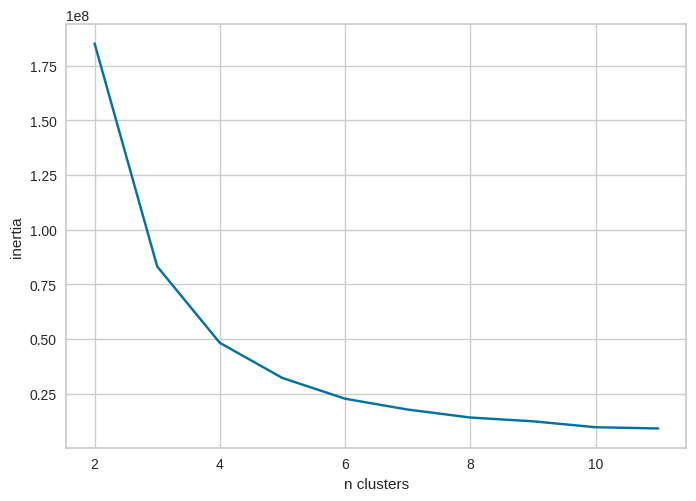

In [12]:
inertia = []
K = range(2, 12)
for n in K:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(df1)
  inertia.append(kmeans.inertia_)

plt.plot(K, inertia)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.show()

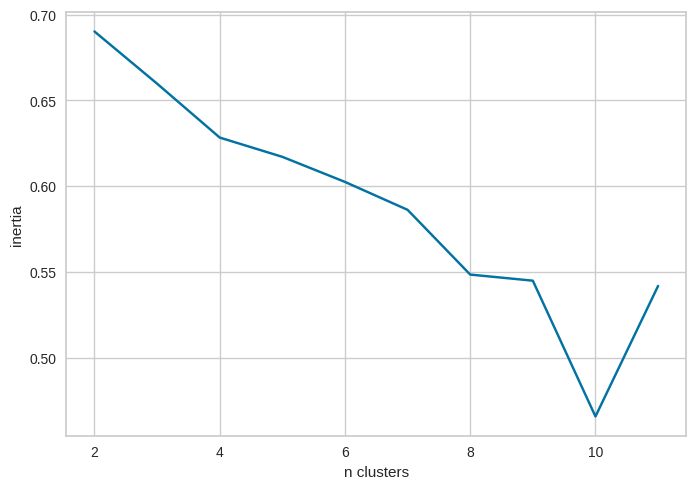

In [13]:
silhouette_scores = []
K = range(2, 12)
for n in K:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(df1)
  y_preds = kmeans.predict(df1)
  silhouette_scores.append(silhouette_score(df1, y_preds))

plt.plot(K, silhouette_scores)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.show()

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4, n_init='auto'))

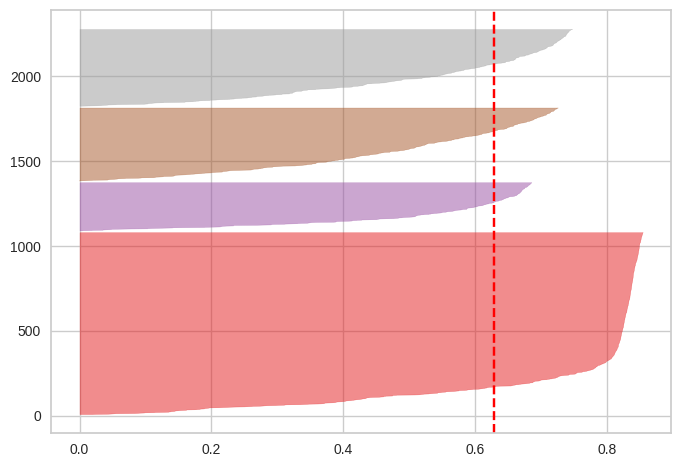

In [15]:
kmeans_1 = KMeans(n_clusters=4, n_init='auto')
visualizer = SilhouetteVisualizer(kmeans_1, color='yellowbrick')
visualizer.fit(df1)

In [ ]:
silhouette_score(df1, y_preds)

In [16]:
kmeans_2 = KMeans(n_clusters=4, n_init='auto')
df1['kmeans_labels'] = kmeans_2.fit_predict(df1)

<Figure size 600x600 with 0 Axes>

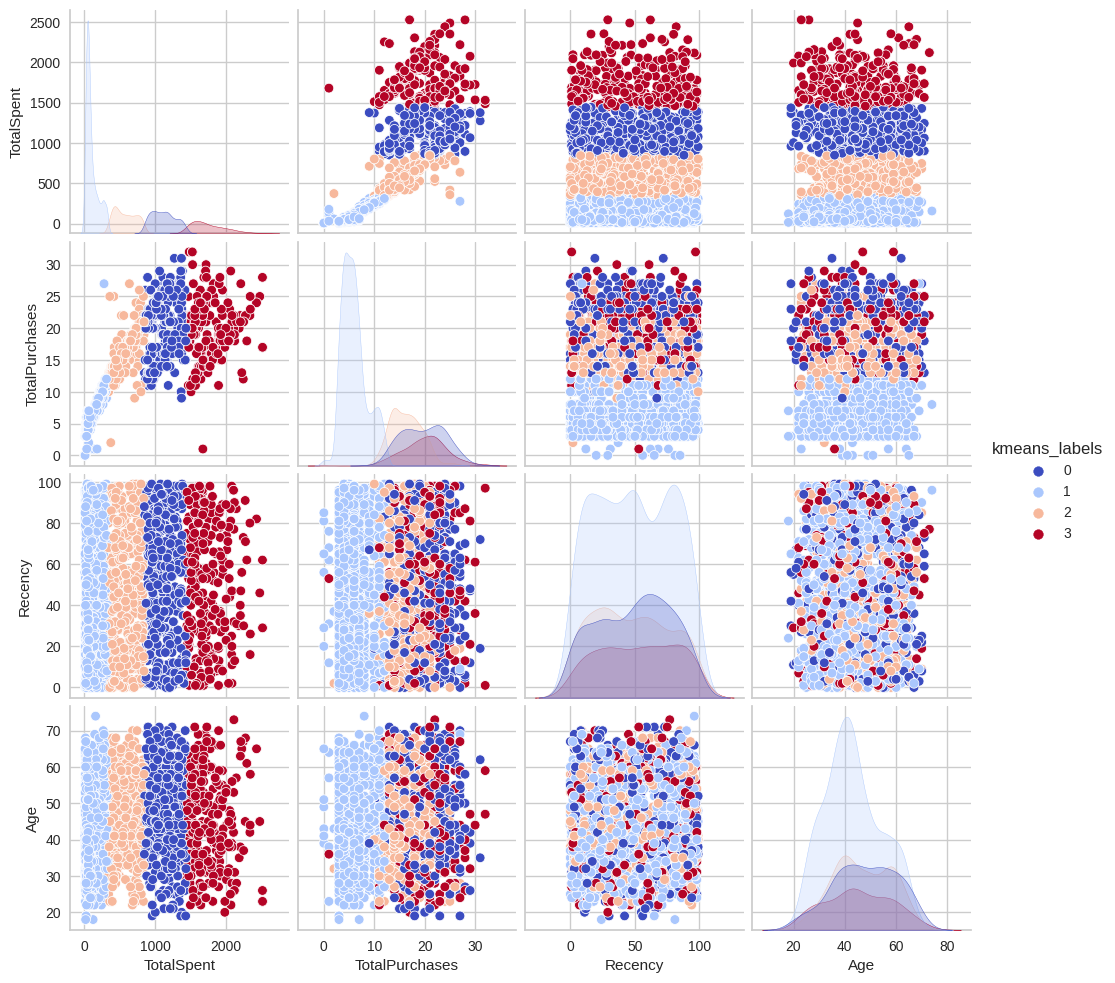

In [17]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df1, hue='kmeans_labels', palette='coolwarm')
plt.show()

In [ ]:
dendro = dendrogram(linkage(df1, method='ward'))
plt.title("Dendrogram - Ward Linkage")
plt.xlabel("Clusters")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_preds = hc.fit_predict(df1)
df1['hc_cluster'] = hc_preds

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df1, hue='hc_cluster', palette='coolwarm')
plt.show()

## DBSCAN

In [18]:
nn = NearestNeighbors(n_neighbors=8)
nn_fit = nn.fit(df1)
distances, indices = nn_fit.kneighbors(df1)

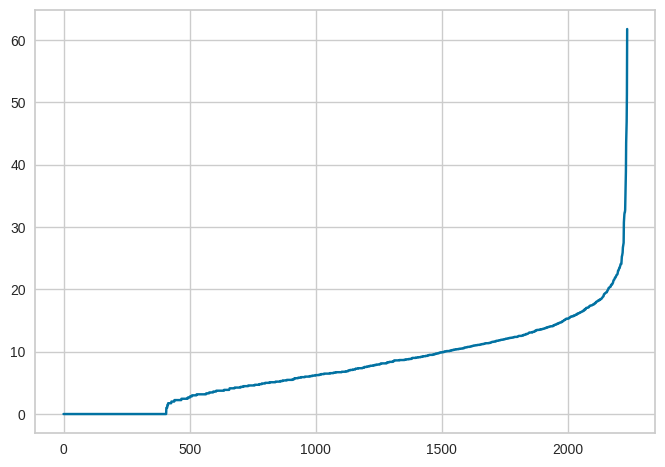

In [19]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

In [23]:
from itertools import product

eps_values = np.arange(10, 36, 2)
min_samples = np.arange(3, 10)

dbscan_params = list(product(eps_values, min_samples))
n_of_clusters = []
sil_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df1)
  try:
    sil_score.append(silhouette_score(df1, y_dbscan))
  except:
    sil_score.append(0)
  n_of_clusters.append(len(np.unique(y_dbscan)))

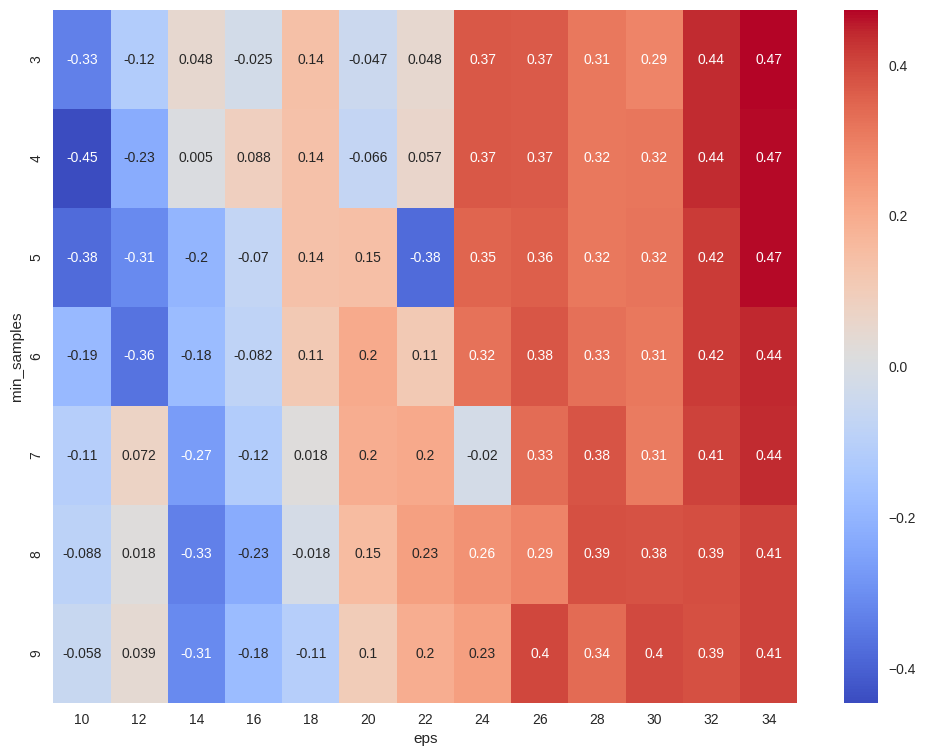

In [24]:
df_params_tuning = pd.DataFrame.from_records(dbscan_params, columns=['eps', 'min_samples'])
df_params_tuning['sil_score'] = np.round(sil_score, 3)
df_params_tuning['n_clusters'] = np.round(n_of_clusters, 3)

pivot = pd.pivot_table(df_params_tuning, values='sil_score', columns='eps', index='min_samples')
pivot2 = pd.pivot_table(df_params_tuning, values='n_clusters', columns='eps', index='min_samples')

plt.figure(figsize=(12,9))
sns.heatmap(pivot, annot=True, annot_kws={'size':10}, cmap='coolwarm')
plt.show()

In [32]:
dbscan = DBSCAN(eps=34, min_samples=3)
df1['dbscan_labels'] = dbscan.fit_predict(df1[vars_for_cluster])

In [33]:
silhouette_score(df1, df1.dbscan_labels)

0.4726048156788056

KeyError: ignored

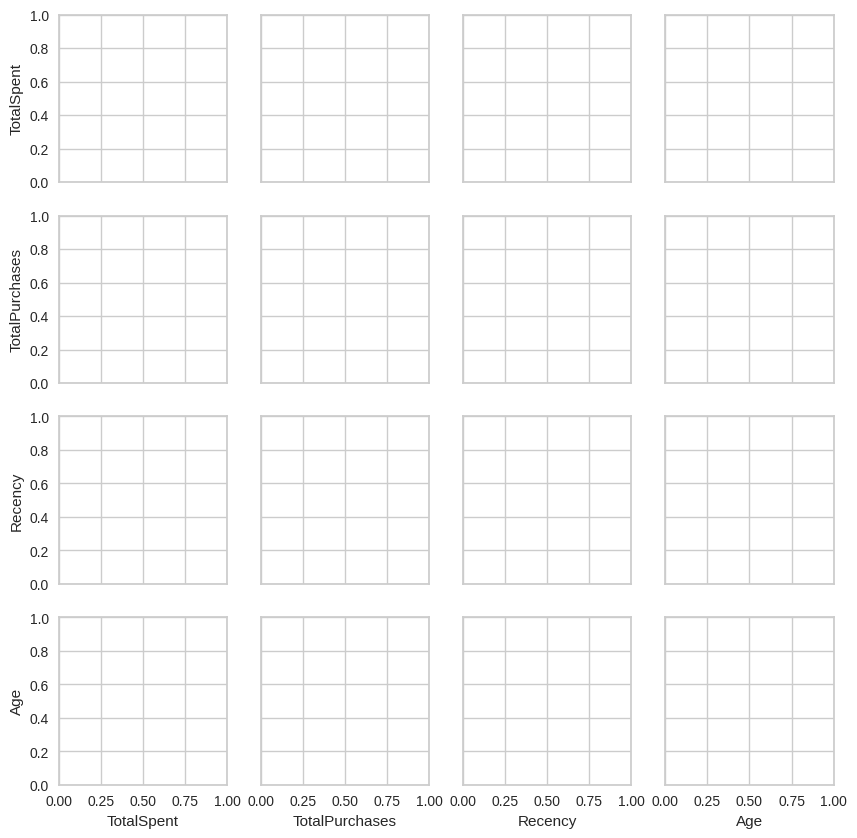

In [34]:
sns.pairplot(df1[vars_for_cluster], hue='dbscan_labels', palette='coolwarm')
plt.show()